AE3
predicting spam emails.
data includes one column of email text, one column of ham/spam
visualizations
- persentage of ham/spam, and word cloud of most occuring words in spam emails and not spam, bar graph of words in spam
- predict with user input of words, wether its spam or not spam, 
- Notes, most spam emails have the word click

In [1]:
!pip install pandas scikit-learn matplotlib networkx
import pandas as pd
import math
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import wordcloud as wc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
"""
Data set link
https://www.kaggle.com/datasets/prishasawhney/email-classification-ham-spam/data
"""

In [2]:
#upload file to a df
df = pd.read_csv("email_classification.csv")
#function for cleaning the data
def clean_data(df):
    """
    Function: clean_data
    Parameters: pandas data frame 
    Return: Will edit the email column by making all lower case, removing punctuation, and removing unessesary white space. Will remove all whitespace in the label column. 
    """
    df["email"] = df["email"].str.lower()
    df["email"] = df["email"].str.replace(r"[^\w\s']",'',regex = True)
    df["email"] = df["email"].str.strip()
    df["label"] = df["label"].str.strip()
    return df
df = clean_data(df)
df

,email,label
0,upgrade to our premium plan for exclusive acce...,ham
1,happy holidays from our team wishing you joy a...,ham
2,we're hiring check out our career opportunitie...,ham
3,your amazon account has been locked click here...,spam
4,your opinion matters take our survey and help ...,ham
...,...,...
174,we're pleased to inform you that your refund h...,ham
175,get rich quick invest in our revolutionary new...,spam
176,your free trial period is ending soon upgrade ...,ham
177,your order is on its way track your shipment f...,ham


{'your': 73, 'amazon': 1, 'account': 33, 'has': 24, 'been': 35, 'locked': 2, 'click': 75, 'here': 75, 'to': 83, 'verify': 4, 'information': 1, 'email': 2, 'storage': 2, 'is': 2, 'full': 2, 'upgrade': 2, "you've": 24, 'chosen': 2, 'for': 19, 'a': 32, 'free': 14, 'iphone': 4, 'claim': 26, 'prize': 17, "you're": 10, 'preapproved': 3, 'loan': 3, 'apply': 3, 'now': 25, 'winner': 7, 'exclusive': 6, 'facebook': 2, 'hacked': 4, 'secure': 3, 'congratulations': 11, 'selected': 11, 'job': 1, 'interview': 2, 'schedule': 1, 'suspended': 4, 'due': 2, 'suspicious': 4, 'activity': 4, 'unlock': 4, 'paypal': 2, 'restore': 2, 'access': 6, 'won': 11, 'luxury': 6, 'car': 2, 'flagged': 2, 'identity': 2, 'get': 9, 'instant': 2, 'cash': 3, 'our': 25, 'quick': 5, 'service': 6, 'banned': 2, 'appeal': 2, 'the': 8, 'ban': 2, 'vacation': 1, 'tropical': 1, 'paradise': 1, 'credit': 3, 'card': 3, 'trial': 7, 'of': 12, 'premium': 7, 'membership': 1, 'sign': 1, 'up': 1, 'activate': 4, 'reset': 3, 'password': 3, 'x': 2,

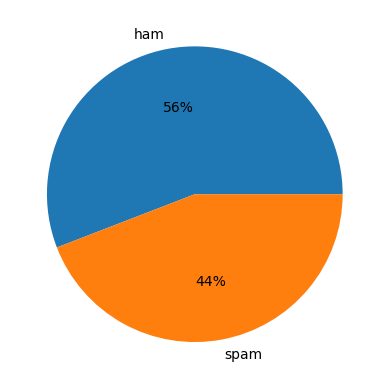

In [3]:
#visualise the data (described above)

#Pie chart showing the share of spam and ham emails.
values_label = df["label"].value_counts()
plt.pie(values_label,labels = values_label.index,autopct='%1.0f%%')
plt.imshow

def list_of_all_spam_words(df):
    """
    Function: list_of_all_spam_words
    Parameters: pandas data frame
    Return: Will return an array of all words in spam emails. 
    """
    words = []
    spam_emails = df[df['label'] == 'spam']["email"]
    for emails in spam_emails:
        emailwords = emails.split()
        for word in emailwords:
            words.append(word)
    return words

def list_of_all_ham_words(df):
    """
    Function: list_of_all_ham_words
    Parameters: pandas data frame
    Return: Will return an array of all words in ham emails. 
    """
    words = []
    spam_emails = df[df['label'] == 'ham']["email"]
    for emails in spam_emails:
        emailwords = emails.split()
        for word in emailwords:
            words.append(word)
    return words

def word_Freq(list_of_word):
    """
    Function: word_Freq
    Parameters: takes an array of words
    Return: Returns a dictionary of every uniqe word in an array of words and its respective frequency
    """
    word_freq = {}
    for word in list_of_word:
        if word not in word_freq.keys():
            word_freq[word] = 1
        else:
            word_freq[word] = word_freq[word]+1
    return word_freq

#print(word_Freq(list_of_all_spam_words(df)))
        
def cloud(frequency):
    """
    Function: cloud
    Parameters: dictionary of word frequencies
    Return: Creates a word cloud with more frequent words in emails appear larger
    """
    cloud = wc.WordCloud().generate_from_frequencies(frequency)#config. cloud
    plt.axis("off")
    plt.imshow(cloud)

def bar_top20(frequency):
    """
    Function: bar_top 20
    Parameters: dictionary of word frequencies
    Return: Creates a bar graph of the top 20 most used words and their frequencies
    """
    top_20_keys = sorted(frequency, key=frequency.get, reverse=True)[:20]
    top_20_values = [frequency[key] for key in top_20_keys]
    plt.bar(top_20_keys,top_20_values)
    plt.xlabel("Top 20 most frequent words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.show

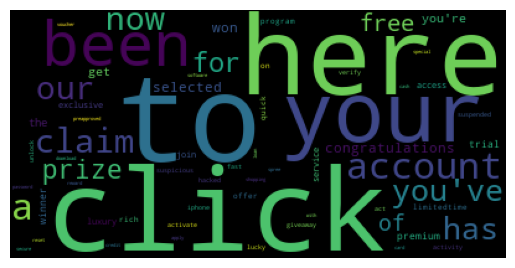

In [4]:
cloud(word_Freq(list_of_all_spam_words(df)))

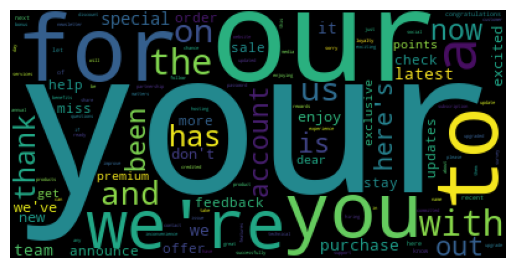

In [80]:
cloud(word_Freq(list_of_all_ham_words(df)))

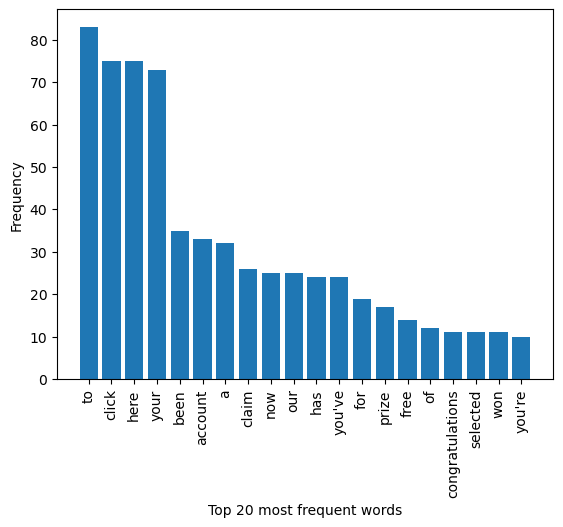

In [15]:
bar_top20(word_Freq(list_of_all_spam_words(df)))

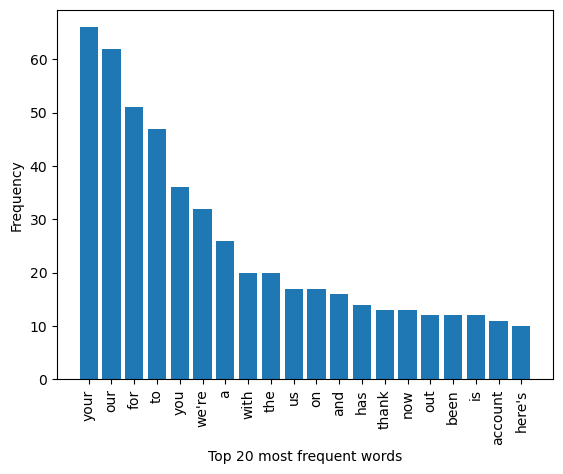

In [14]:
bar_top20(word_Freq(list_of_all_ham_words(df)))

Data Analysis
- Data has 179 emails labeled either spam or ham, ham meaning not spam.
- About 56% of data are not spam email and the remaining 44% are spam
- The most frequent words used in spam emails were "to", "click", "here", "your", and "been"
- The most frequent words used in ham emails were "your", "our", "for", "to", and "you"
- What seems to be the main defining factor between spam and ham emails is that spam emails contain the words click and here. The phrase "click here" will occur promting the recipient to click on a link to either log into an account, share information, etc.
- Ham emails do not contain the words "click here"

In [5]:
#machine learning
#train test split
Xtrain, xtest, ytrain, ytest = train_test_split(df["email"],df["label"], test_size = 0.2, random_state = 42)

#convert next to numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(Xtrain)
X_test_tfidf = tfidf_vectorizer.transform(xtest)

#model we will use - Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, ytrain)

#predict
y_pred = model.predict(X_test_tfidf)

#classification report
print(classification_report(ytest, y_pred))

#predict single email
testEmail = "Hey howard, how is it going?"
vect_test = tfidf_vectorizer.transform([testEmail])
prediction = model.predict(vect_test)
print(prediction)

              precision    recall  f1-score   support

         ham       0.93      1.00      0.97        14
        spam       1.00      0.95      0.98        22

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

['ham']


In [25]:
#User interface
User_email = input("Type an email to detect if its spam: ")
vect_test = tfidf_vectorizer.transform([User_email])
prediction = model.predict(vect_test)
print("Your email you recieved is, ", prediction)

Type an email to detect if its spam:  This email is totaly not spam.


Your email you recieved is,  ['spam']
